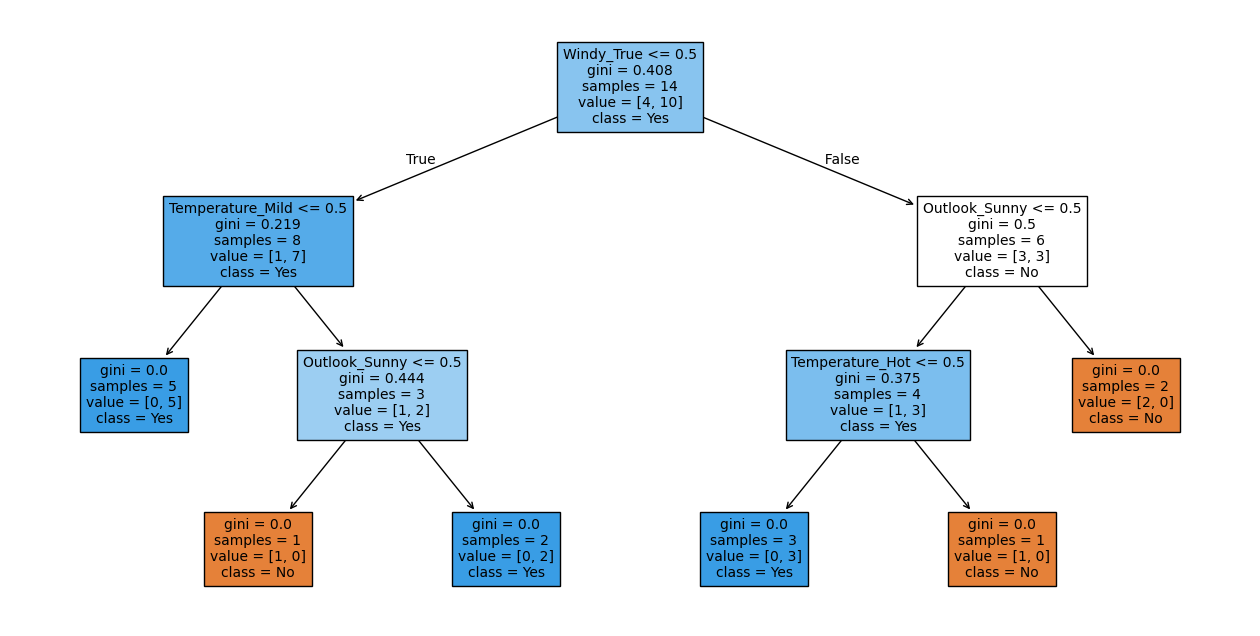

|--- Windy_True <= 0.50
|   |--- Temperature_Mild <= 0.50
|   |   |--- class: True
|   |--- Temperature_Mild >  0.50
|   |   |--- Outlook_Sunny <= 0.50
|   |   |   |--- class: False
|   |   |--- Outlook_Sunny >  0.50
|   |   |   |--- class: True
|--- Windy_True >  0.50
|   |--- Outlook_Sunny <= 0.50
|   |   |--- Temperature_Hot <= 0.50
|   |   |   |--- class: True
|   |   |--- Temperature_Hot >  0.50
|   |   |   |--- class: False
|   |--- Outlook_Sunny >  0.50
|   |   |--- class: False

Decision Tree trained using given question data


In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Question dataset (Play Tennis)
data = {
    'Outlook': ['Rainy','Rainy','Overcast','Sunny','Sunny','Sunny','Overcast',
                'Rainy','Rainy','Sunny','Rainy','Overcast','Overcast','Sunny'],
    'Temperature': ['Hot','Hot','Hot','Mild','Cool','Cool','Cool',
                    'Mild','Cool','Mild','Mild','Mild','Hot','Mild'],
    'Humidity': ['High','High','High','High','Normal','Normal','Normal',
                 'High','Normal','Normal','Normal','High','Normal','High'],
    'Windy': ['False','True','False','False','False','True','True',
             'False','False','False','True','True','False','True'],
    'PlayTennis': ['Yes','No','Yes','Yes','Yes','No','Yes',
                    'No','Yes','Yes','Yes','Yes','Yes','No']
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert categorical data into numbers
df_encoded = pd.get_dummies(df, drop_first=True)

# Split input and output (NO train-test split)
X = df_encoded.drop('PlayTennis_Yes', axis=1)
y = df_encoded['PlayTennis_Yes']

# Create Decision Tree using Gini Index (CART)
dt = DecisionTreeClassifier(criterion="gini")

# Train on full question data
dt.fit(X, y)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    fontsize=10
)
plt.show()

from sklearn.tree import export_text

tree_rules = export_text(dt, feature_names=list(X.columns))
print(tree_rules)


print("Decision Tree trained using given question data")
